In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

## 2000 stars

## 1 bin

In [3]:
burst2000_1bin=np.load('/home/lee/data/2000stars_only/burst2000_1.npy')
L2000_1bin=np.load('/home/lee/data/2000stars_only/L2000_1.npy')
C2000_1bin=np.load('/home/lee/data/2000stars_only/C2000_1.npy')

In [3]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

In [5]:
print(t_list_cadence)

[5200, 5720, 5733, 5746, 5759, 5772, 5785, 5798, 5811, 5824, 5837, 5850]


In [6]:
L1bin=np.zeros((run,cluster_size,12))
for i in range(run):
    for j in range(cluster_size):
        for k in range(len(t_list_cadence)):
                L1bin[i,j,k]=L2000_1bin[i,j,t_list_cadence[k]]
                
print(np.shape(L1bin))

(50, 2000, 12)


In [7]:
print(L1bin[0,25,:])

[-0.83160103 -0.83160103 -0.83160103 -0.83160103 -0.83160103 -0.83160103
 -0.83160103 -0.83160103 -0.83160103 -0.83160103 -0.83160103 -0.83160103]


In [8]:
num0_1bin=0
num100_1bin=0
num100_list_1bin=[]
num0_list_1bin=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size):
            if L1bin[i,k,j]-L1bin[i,k,j-1]==5 or L1bin[i,k,j-1]-L1bin[i,k,j]==5:
                num100_1bin+=1
            else:
                num0_1bin+=1
    num100_list_1bin.append(num100_1bin)
    num100_1bin=0
    num0_list_1bin.append(num0_1bin)
    num0_1bin=0

In [9]:
print(num100_list_1bin)

[29, 24, 32, 26, 33, 22, 33, 33, 29, 42, 33, 26, 31, 21, 21, 46, 30, 28, 24, 26, 27, 33, 24, 25, 29, 26, 32, 28, 34, 35, 35, 25, 33, 32, 28, 40, 17, 21, 22, 31, 24, 31, 31, 32, 31, 31, 31, 31, 19, 39]


In [10]:
print(num0_list_1bin)

[21971, 21976, 21968, 21974, 21967, 21978, 21967, 21967, 21971, 21958, 21967, 21974, 21969, 21979, 21979, 21954, 21970, 21972, 21976, 21974, 21973, 21967, 21976, 21975, 21971, 21974, 21968, 21972, 21966, 21965, 21965, 21975, 21967, 21968, 21972, 21960, 21983, 21979, 21978, 21969, 21976, 21969, 21969, 21968, 21969, 21969, 21969, 21969, 21981, 21961]


In [11]:
num100_final_1bin=[]
for i in range(run):
    num100_final_1bin.append(num100_list_1bin[i]*100)
    
num0_final_1bin=[]
for i in range(run):
    num0_final_1bin.append(num0_list_1bin[i]*1)

In [12]:
num100_total_1bin=[]
num0_total_1bin=[]
for i in range(run):
    total1=num100_final_1bin[i]+num0_final_1bin[i]
    num100_total_1bin.append(100*num100_final_1bin[i]/total1)
    num0_total_1bin.append(100*num0_final_1bin[i]/total1)
    
print(num0_total_1bin)

[88.33983354107193, 90.15425008204791, 87.28544183089637, 89.4197118906161, 86.9394862864606, 90.90081892629664, 86.9394862864606, 86.9394862864606, 88.33983354107193, 83.94372658460127, 86.9394862864606, 89.4197118906161, 87.63412980174718, 91.2787075875244, 91.2787075875244, 82.67680952022295, 87.98558269923909, 88.69691587275956, 90.15425008204791, 89.4197118906161, 89.05686377821911, 86.9394862864606, 90.15425008204791, 89.78549540347294, 88.33983354107193, 89.4197118906161, 87.28544183089637, 88.69691587275956, 86.59623117558937, 86.25564500294522, 86.25564500294522, 89.78549540347294, 86.9394862864606, 87.28544183089637, 88.69691587275956, 84.59167950693374, 92.8218553392729, 91.2787075875244, 90.90081892629664, 87.63412980174718, 90.15425008204791, 87.63412980174718, 87.63412980174718, 87.28544183089637, 87.63412980174718, 87.63412980174718, 87.63412980174718, 87.63412980174718, 92.04388425945312, 84.91937666756893]


<ipython-input-13-be3ef652d00f>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','100x'])


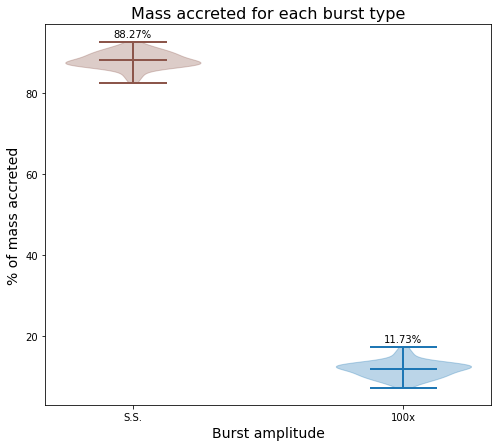

In [13]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_1bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_1bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_1bin))
string100='{:.2f}%'.format(np.mean(num100_total_1bin))

ax1.locator_params(axis='x',nbins=2)
ax1.text(1,np.max(num0_total_1bin)+1,string0,ha='center')
ax1.text(2,np.max(num100_total_1bin)+1,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_1bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

## 2 bin

In [14]:
burst2000_2bin=np.load('/home/lee/data/2000stars_only/burst2000_2.npy')
L2000_2bin=np.load('/home/lee/data/2000stars_only/L2000_2.npy')
C2000_2bin=np.load('/home/lee/data/2000stars_only/C2000_2.npy')

In [15]:
L2bin=np.empty((run,cluster_size,len(t_list_cadence)))
for i in range(run):
    for k in range(cluster_size):
        for j in range(len(t_list_cadence)):
            L2bin[i,k,j]=L2000_2bin[i,k,t_list_cadence[j]]

In [16]:
num0_2bin=0
num0_list_2bin=[]
num40_2bin=0
num40_list_2bin=[]
num100_2bin=0
num100_list_2bin=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size):
            if L2bin[i,k,j]-L2bin[i,k,j-1]==5 or L2bin[i,k,j-1]-L2bin[i,k,j]==5:
                num100_2bin+=1
            elif L2bin[i,k,j]-L2bin[i,k,j-1]==4 or L2bin[i,k,j-1]-L2bin[i,k,j]==4:
                num40_2bin+=1
            else:
                num0_2bin+=1
    num0_list_2bin.append(num0_2bin)
    num0_2bin=0
    num40_list_2bin.append(num40_2bin)
    num40_2bin=0
    num100_list_2bin.append(num100_2bin)
    num100_2bin=0

In [17]:
num100_final_2bin=[]
for i in range(run):
    num100_final_2bin.append(num100_list_2bin[i]*100)
    
num40_final_2bin=[]
for i in range(run):
    num40_final_2bin.append(num40_list_2bin[i]*40)
    
num0_final_2bin=[]
for i in range(run):
    num0_final_2bin.append(num0_list_2bin[i]*1)

In [18]:
num100_total_2bin=[]
num40_total_2bin=[]
num0_total_2bin=[]
for i in range(run):
    total2=num100_final_2bin[i]+num40_final_2bin[i]+num0_final_2bin[i]
    num100_total_2bin.append(100*num100_final_2bin[i]/total2)
    num40_total_2bin.append(100*num40_final_2bin[i]/total2)
    num0_total_2bin.append(100*num0_final_2bin[i]/total2)
    
print(num0_total_2bin)

[78.53014037985136, 72.63921712212496, 78.35901110713006, 77.85925319474602, 76.81118684561872, 80.44477118176806, 77.57513394599582, 78.92609699769054, 80.32594332697107, 79.45106012198664, 76.96858712494718, 78.76016991864066, 77.46438948338177, 80.09367681498829, 78.75328603838813, 77.97576621525303, 78.35668470276275, 79.21946274708566, 77.41033176362285, 78.193257784292, 78.86765236206274, 83.46351686035435, 75.57093425605537, 77.9710558209168, 80.15160947742338, 80.68772343640585, 79.0409424348643, 79.91601241555595, 80.4426145136387, 79.38518491634305, 79.50581395348837, 74.64114832535886, 80.09149130832571, 79.44882175665371, 81.1055127445169, 83.27314198821517, 82.57984238905019, 78.08082250464086, 75.2228225334664, 75.74581615328644, 79.44658290362408, 77.30486425339366, 79.0409424348643, 75.41945729475937, 79.97149227001937, 76.48869918130292, 80.86442556335426, 76.4310941707172, 79.38742923501233, 79.04548574731746]


<ipython-input-19-4cfeedbadcd6>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','40x','100x'])


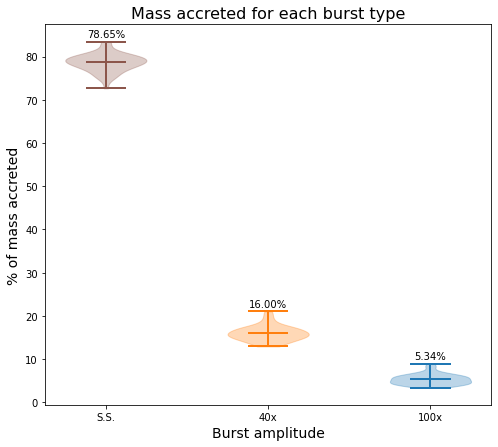

In [19]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_2bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_2bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_2bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_2bin))
string40='{:.2f}%'.format(np.mean(num40_total_2bin))
string100='{:.2f}%'.format(np.mean(num100_total_2bin))
ax1.locator_params(axis='x',nbins=3)

ax1.text(1,np.max(num0_total_2bin)+1,string0,ha='center')
ax1.text(2,np.max(num40_total_2bin)+1,string40,ha='center')
ax1.text(3,np.max(num100_total_2bin)+1,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_2bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

## 3 bin

In [20]:
burst2000_3bin=np.load('/home/lee/data/2000stars_only/burst2000_3.npy')
L2000_3bin=np.load('/home/lee/data/2000stars_only/L2000_3.npy')
C2000_3bin=np.load('/home/lee/data/2000stars_only/C2000_3.npy')

In [21]:
L3bin=np.empty((run,cluster_size,len(t_list_cadence)))
for i in range(run):
    for k in range(cluster_size):
        for j in range(len(t_list_cadence)):
            L3bin[i,k,j]=L2000_3bin[i,k,t_list_cadence[j]]

In [22]:
print(L3bin[0,69,:])

[-4.50795972 -7.50795972 -7.50795972 -4.50795972 -4.50795972 -4.50795972
 -4.50795972 -4.50795972 -4.50795972 -4.50795972 -4.50795972 -4.50795972]


In [23]:
num0_3bin=0
num0_list_3bin=[]
num16_3bin=0
num16_list_3bin=[]
num40_3bin=0
num40_list_3bin=[]
num100_3bin=0
num100_list_3bin=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size):
            if L3bin[i,k,j]-L3bin[i,k,j-1]==5 or L3bin[i,k,j-1]-L3bin[i,k,j]==5:
                num100_3bin+=1
            elif L3bin[i,k,j]-L3bin[i,k,j-1]==4 or L3bin[i,k,j-1]-L3bin[i,k,j]==4:
                num40_3bin+=1
            elif L3bin[i,k,j]-L3bin[i,k,j-1]==3 or L3bin[i,k,j-1]-L3bin[i,k,j]==3:
                num16_3bin+=1
            else:
                num0_3bin+=1
    num0_list_3bin.append(num0_3bin)
    num0_3bin=0
    num16_list_3bin.append(num16_3bin)
    num16_3bin=0
    num40_list_3bin.append(num40_3bin)
    num40_3bin=0
    num100_list_3bin.append(num100_3bin)
    num100_3bin=0

In [24]:
num100_final_3bin=[]
for i in range(run):
    num100_final_3bin.append(num100_list_3bin[i]*100)
    
num40_final_3bin=[]
for i in range(run):
    num40_final_3bin.append(num40_list_3bin[i]*40)
    
num16_final_3bin=[]
for i in range(run):
    num16_final_3bin.append(num16_list_3bin[i]*16)
    
num0_final_3bin=[]
for i in range(run):
    num0_final_3bin.append(num0_list_3bin[i]*1)

In [25]:
num100_total_3bin=[]
num40_total_3bin=[]
num16_total_3bin=[]
num0_total_3bin=[]
for i in range(run):
    total3=num100_final_3bin[i]+num40_final_3bin[i]+num16_final_3bin[i]+num0_final_3bin[i]
    num100_total_3bin.append(100*num100_final_3bin[i]/total3)
    num40_total_3bin.append(100*num40_final_3bin[i]/total3)
    num16_total_3bin.append(100*num16_final_3bin[i]/total3)
    num0_total_3bin.append(100*num0_final_3bin[i]/total3)
    
print(num0_total_3bin)

[67.02598292728518, 67.52174322584696, 65.59638627762178, 66.763957026641, 65.86545821978628, 68.32274459974587, 69.287137622935, 67.8236220472441, 65.18152315671348, 66.47602559742789, 67.62365963334486, 69.18429003021149, 68.53560745879209, 67.5444660926403, 66.72974901498465, 67.54107630925827, 69.00397384950648, 68.58044566291562, 62.619117217187956, 66.28229635567614, 65.4272827014507, 67.64307963376648, 68.97655949788651, 67.59203948816298, 67.46723521665517, 68.25316295145385, 63.19712459122647, 67.83014112903226, 65.30885214007782, 65.86113837095192, 66.03750384260682, 66.99488969213512, 66.81076037941222, 66.58092906504694, 65.63855127343798, 67.29638433629425, 66.41996717554888, 67.71752837326608, 68.95778617641406, 67.96358924112646, 68.28943192637259, 68.62845118918574, 67.51530371998116, 63.075836912396305, 66.28825271470879, 68.04707520010123, 64.5345688669595, 67.61754992923416, 68.04812410954567, 69.27825108503455]


<ipython-input-26-a90c4a43badb>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','16x','40x','100x'])


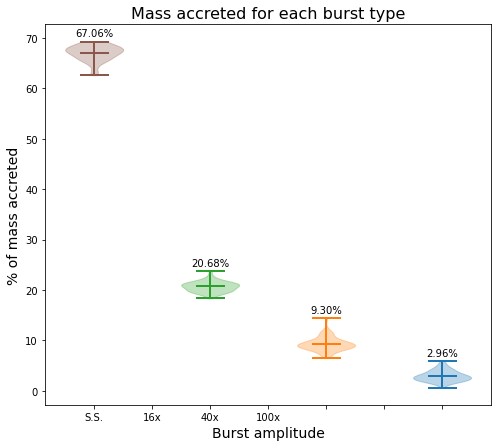

In [26]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_3bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_3bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_3bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

v0=ax1.violinplot(num0_total_3bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_3bin))
string16='{:.2f}%'.format(np.mean(num16_total_3bin))
string40='{:.2f}%'.format(np.mean(num40_total_3bin))
string100='{:.2f}%'.format(np.mean(num100_total_3bin))


ax1.text(1,np.max(num0_total_3bin)+1,string0,ha='center')
ax1.text(2,np.max(num16_total_3bin)+1,string16,ha='center')
ax1.text(3,np.max(num40_total_3bin)+1,string40,ha='center')
ax1.text(4,np.max(num100_total_3bin)+1,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_3bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()  

## 4 bin

In [27]:
burst2000_4bin=np.load('/home/lee/data/2000stars_only/burst2000_4.npy')
L2000_4bin=np.load('/home/lee/data/2000stars_only/L2000_4.npy')
C2000_4bin=np.load('/home/lee/data/2000stars_only/C2000_4.npy')

In [28]:
L4bin=np.empty((run,cluster_size,len(t_list_cadence)))
for i in range(run):
    for k in range(cluster_size):
        for j in range(len(t_list_cadence)):
            L4bin[i,k,j]=L2000_4bin[i,k,t_list_cadence[j]]

In [29]:
num0_4bin=0
num0_list_4bin=[]
num3_4bin=0
num3_list_4bin=[]
num16_4bin=0
num16_list_4bin=[]
num40_4bin=0
num40_list_4bin=[]
num100_4bin=0
num100_list_4bin=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size):
            if L4bin[i,k,j]-L4bin[i,k,j-1]==5 or L4bin[i,k,j-1]-L4bin[i,k,j]==5:
                num100_4bin+=1
            elif L4bin[i,k,j]-L4bin[i,k,j-1]==4 or L4bin[i,k,j-1]-L4bin[i,k,j]==4:
                num40_4bin+=1
            elif L4bin[i,k,j]-L4bin[i,k,j-1]==3 or L4bin[i,k,j-1]-L4bin[i,k,j]==3:
                num16_4bin+=1
            elif L4bin[i,k,j]-L4bin[i,k,j-1]==1.25 or L4bin[i,k,j-1]-L4bin[i,k,j]==1.25:
                num3_4bin+=1
            else:
                num0_4bin+=1
    num0_list_4bin.append(num0_4bin)
    num0_4bin=0
    num3_list_4bin.append(num3_4bin)
    num3_4bin=0
    num16_list_4bin.append(num16_4bin)
    num16_4bin=0
    num40_list_4bin.append(num40_4bin)
    num40_4bin=0
    num100_list_4bin.append(num100_4bin)
    num100_4bin=0

In [30]:
num100_final_4bin=[]
for i in range(run):
    num100_final_4bin.append(num100_list_4bin[i]*100)
    
num40_final_4bin=[]
for i in range(run):
    num40_final_4bin.append(num40_list_4bin[i]*40)
    
num16_final_4bin=[]
for i in range(run):
    num16_final_4bin.append(num16_list_4bin[i]*16)
    
num3_final_4bin=[]
for i in range(run):
    num3_final_4bin.append(num3_list_4bin[i]*3)
    
num0_final_4bin=[]
for i in range(run):
    num0_final_4bin.append(num0_list_4bin[i]*1)

In [31]:
num100_total_4bin=[]
num40_total_4bin=[]
num16_total_4bin=[]
num3_total_4bin=[]
num0_total_4bin=[]
for i in range(run):
    total4=num100_final_4bin[i]+num40_final_4bin[i]+num16_final_4bin[i]+num3_final_4bin[i]+num0_final_4bin[i]
    num100_total_4bin.append(100*num100_final_4bin[i]/total4)
    num40_total_4bin.append(100*num40_final_4bin[i]/total4)
    num16_total_4bin.append(100*num16_final_4bin[i]/total4)
    num3_total_4bin.append(100*num3_final_4bin[i]/total4)
    num0_total_4bin.append(100*num0_final_4bin[i]/total4)
    
print(num0_total_4bin)

[54.058712012408805, 53.99718689898671, 55.36045177799347, 54.47510289258594, 53.972547552588416, 53.07631070169453, 53.846375061110635, 54.26302671999073, 54.11139821992535, 53.31309922278323, 51.59736936242811, 54.73118279569893, 55.33536585365854, 54.91393670183231, 54.3084783926561, 54.25534978831255, 53.97693122298864, 54.95132005964389, 53.45508250731347, 53.74654154425397, 53.47575255612041, 53.83421922137624, 53.125886424235546, 55.973628723309474, 53.319319376189526, 54.226102994150025, 53.46362339514979, 53.304392528702806, 55.51532279431246, 56.20144655772837, 54.11646297627606, 54.59711792165618, 55.16898608349901, 53.44426145720938, 53.617397756785294, 53.30808008886104, 54.35041370300479, 52.65039551839653, 54.55547178565215, 55.09111020550736, 54.23037130704679, 54.36757917960926, 54.66224857574701, 54.71320973348784, 54.95033643063121, 54.2517595477097, 53.962502875546356, 52.806194540213646, 54.35451116913258, 54.09613495869201]


<ipython-input-32-219d78cf21c9>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])


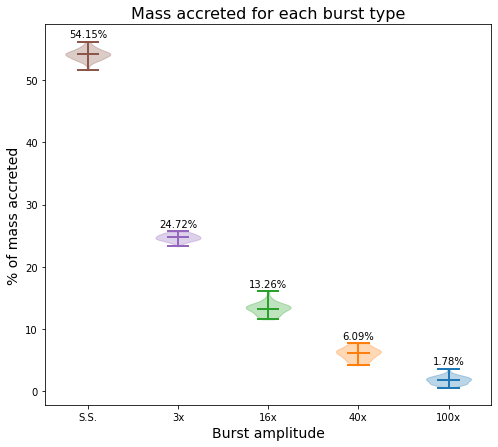

In [32]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_4bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_4bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_4bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_4bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_4bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','3x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_4bin))
string3='{:.2f}%'.format(np.mean(num3_total_4bin))
string16='{:.2f}%'.format(np.mean(num16_total_4bin))
string40='{:.2f}%'.format(np.mean(num40_total_4bin))
string100='{:.2f}%'.format(np.mean(num100_total_4bin))


ax1.text(1,np.max(num0_total_4bin)+0.75,string0,ha='center')
ax1.text(2,np.max(num3_total_4bin)+0.75,string3,ha='center')
ax1.text(3,np.max(num16_total_4bin)+0.75,string16,ha='center')
ax1.text(4,np.max(num40_total_4bin)+0.75,string40,ha='center')
ax1.text(5,np.max(num100_total_4bin)+0.75,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_4bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()   

## 5 bin

In [33]:
burst2000_5bin=np.load('/home/lee/data/2000stars_only/burst2000_5.npy')
L2000_5bin=np.load('/home/lee/data/2000stars_only/L2000_5.npy')
C2000_5bin=np.load('/home/lee/data/2000stars_only/C2000_5.npy')

In [34]:
L5bin=np.zeros((run,cluster_size,12))
for i in range(run):
    for j in range(cluster_size):
        for k in range(len(t_list_cadence)):
                L5bin[i,j,k]=L2000_5bin[i,j,t_list_cadence[k]]

In [35]:
num0_5bin=0
num0_list_5bin=[]
num3_5bin=0
num3_list_5bin=[]
num6_5bin=0
num6_list_5bin=[]
num16_5bin=0
num16_list_5bin=[]
num40_5bin=0
num40_list_5bin=[]
num100_5bin=0
num100_list_5bin=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size):
            if L5bin[i,k,j]-L5bin[i,k,j-1]==5 or L5bin[i,k,j-1]-L5bin[i,k,j]==5:
                num100_5bin+=1
            elif L5bin[i,k,j]-L5bin[i,k,j-1]==4 or L5bin[i,k,j-1]-L5bin[i,k,j]==4:
                num40_5bin+=1
            elif L5bin[i,k,j]-L5bin[i,k,j-1]==3 or L5bin[i,k,j-1]-L5bin[i,k,j]==3:
                num16_5bin+=1
            elif L5bin[i,k,j]-L5bin[i,k,j-1]==2 or L5bin[i,k,j-1]-L5bin[i,k,j]==2:
                num6_5bin+=1
            elif L5bin[i,k,j]-L5bin[i,k,j-1]==1.25 or L5bin[i,k,j-1]-L5bin[i,k,j]==1.25:
                num3_5bin+=1
            else:
                num0_5bin+=1
    num0_list_5bin.append(num0_5bin)
    num0_5bin=0
    num3_list_5bin.append(num3_5bin)
    num3_5bin=0
    num6_list_5bin.append(num6_5bin)
    num6_5bin=0
    num16_list_5bin.append(num16_5bin)
    num16_5bin=0
    num40_list_5bin.append(num40_5bin)
    num40_5bin=0
    num100_list_5bin.append(num100_5bin)
    num100_5bin=0

In [36]:
num100_final_5bin=[]
for i in range(run):
    num100_final_5bin.append(num100_list_5bin[i]*100)
    
num40_final_5bin=[]
for i in range(run):
    num40_final_5bin.append(num40_list_5bin[i]*40)
    
num16_final_5bin=[]
for i in range(run):
    num16_final_5bin.append(num16_list_5bin[i]*16)
    
num6_final_5bin=[]
for i in range(run):
    num6_final_5bin.append(num6_list_5bin[i]*6)
    
num3_final_5bin=[]
for i in range(run):
    num3_final_5bin.append(num3_list_5bin[i]*3)
    
num0_final_5bin=[]
for i in range(run):
    num0_final_5bin.append(num0_list_5bin[i]*1)

In [37]:
num100_total_5bin=[]
num40_total_5bin=[]
num16_total_5bin=[]
num3_total_5bin=[]
num6_total_5bin=[]
num0_total_5bin=[]
for i in range(run):
    total5=num100_final_5bin[i]+num40_final_5bin[i]+num16_final_5bin[i]+num6_final_5bin[i]+num3_final_5bin[i]+num0_final_5bin[i]
    num100_total_5bin.append(100*num100_final_5bin[i]/total5)
    num40_total_5bin.append(100*num40_final_5bin[i]/total5)
    num16_total_5bin.append(100*num16_final_5bin[i]/total5)
    num3_total_5bin.append(100*num3_final_5bin[i]/total5)
    num6_total_5bin.append(100*num6_final_5bin[i]/total5)
    num0_total_5bin.append(100*num0_final_5bin[i]/total5)

<ipython-input-38-9ffa005a31a0>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])


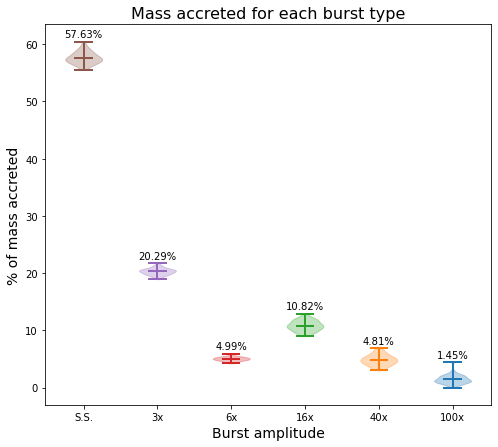

In [38]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

v100=ax1.violinplot(num100_total_5bin,positions=[6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
    
v40=ax1.violinplot(num40_total_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(num16_total_5bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(num6_total_5bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(num3_total_5bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
v0=ax1.violinplot(num0_total_5bin,positions=[1],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#8c564b')
    pc.set_edgecolor('#8c564b')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#8c564b')
    vp.set_linewidth(2) 
    
ax1.set_xticklabels(['0','S.S.','3x','6x','16x','40x','100x'])
ax1.set_ylabel('% of mass accreted',fontsize=14)
ax1.set_xlabel('Burst amplitude',fontsize=14)
    
string0='{:.2f}%'.format(np.mean(num0_total_5bin))
string3='{:.2f}%'.format(np.mean(num3_total_5bin))
string6='{:.2f}%'.format(np.mean(num6_total_5bin))
string16='{:.2f}%'.format(np.mean(num16_total_5bin))
string40='{:.2f}%'.format(np.mean(num40_total_5bin))
string100='{:.2f}%'.format(np.mean(num100_total_5bin))


ax1.text(1,np.max(num0_total_5bin)+0.75,string0,ha='center')
ax1.text(2,np.max(num3_total_5bin)+0.75,string3,ha='center')
ax1.text(3,np.max(num6_total_5bin)+0.75,string6,ha='center')
ax1.text(4,np.max(num16_total_5bin)+0.75,string16,ha='center')
ax1.text(5,np.max(num40_total_5bin)+0.75,string40,ha='center')
ax1.text(6,np.max(num100_total_5bin)+0.75,string100,ha='center')
plt.title('Mass accreted for each burst type',fontsize=16)
plt.savefig('/home/lee/research/figs/observational/observational_mass_5bins_violinplot.jpeg',dpi=300,bbox_inches='tight')
plt.show()    

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9f7f631850>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7fa3ff62d130>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9f7f6315e0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9f7f6313a0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fa3ff6332e0>}

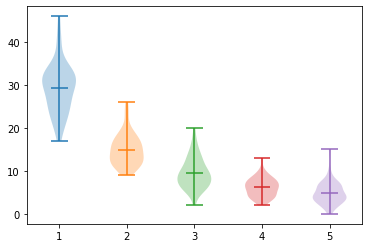

In [39]:
plt.violinplot(num100_list_1bin,vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num100_list_2bin,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num100_list_3bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num100_list_4bin,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num100_list_5bin,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)


In [40]:
data100=[num100_list_1bin,num100_list_2bin,num100_list_3bin,num100_list_4bin,num100_list_5bin]
data40=[num40_list_2bin,num40_list_3bin,num40_list_4bin,num40_list_5bin]
data16=[num16_list_3bin,num16_list_4bin,num16_list_5bin]
data3=[num3_list_4bin,num3_list_5bin]
data6=[num6_list_5bin]

In [41]:
print(data3)

[[2846, 2838, 2851, 2861, 2873, 2992, 2935, 2950, 2797, 2865, 2822, 2851, 2780, 2868, 2836, 2801, 2772, 2896, 2832, 2820, 2910, 2924, 2907, 2859, 2859, 2812, 2913, 2982, 2833, 2809, 2828, 2841, 2790, 2820, 2864, 2930, 2948, 2920, 2832, 2724, 2762, 2925, 2854, 2783, 2798, 2848, 2878, 2952, 2902, 2925], [2202, 2330, 2297, 2252, 2140, 2155, 2269, 2351, 2280, 2236, 2194, 2285, 2261, 2258, 2280, 2191, 2152, 2265, 2250, 2210, 2200, 2163, 2237, 2282, 2141, 2194, 2394, 2186, 2269, 2411, 2296, 2252, 2292, 2245, 2229, 2257, 2285, 2240, 2212, 2423, 2266, 2234, 2169, 2323, 2214, 2294, 2212, 2353, 2322, 2215]]


In [42]:
#make it log scale?
data100new=[]
list100=[]
for i in range(5):
    for j in range(50):
        if data100[i][j]!=0:
            list100.append(data100[i][j])
    data100new.append(list100)
    list100=[]
    
data40new=[]
list40=[]
for i in range(4):
    for j in range(50):
        if data40[i][j]!=0:
            list40.append(data40[i][j])
    data40new.append(list40)
    list40=[]
    
data16new=[]
list16=[]
for i in range(3):
    for j in range(50):
        if data16[i][j]!=0:
            list16.append(data16[i][j])
    data16new.append(list16)
    list16=[]
    
data6new=[]
list6=[]
for i in range(1):
    for j in range(50):
        if data6[i][j]!=0:
            list6.append(data6[i][j])
    data6new.append(list6)
    list6=[]
    
data3new=[]
list3=[]
for i in range(2):
    for j in range(50):
        if data3[i][j]!=0:
            list3.append(data3[i][j])
    data3new.append(list3)
    list3=[]

In [43]:
print(data3new)

[[2846, 2838, 2851, 2861, 2873, 2992, 2935, 2950, 2797, 2865, 2822, 2851, 2780, 2868, 2836, 2801, 2772, 2896, 2832, 2820, 2910, 2924, 2907, 2859, 2859, 2812, 2913, 2982, 2833, 2809, 2828, 2841, 2790, 2820, 2864, 2930, 2948, 2920, 2832, 2724, 2762, 2925, 2854, 2783, 2798, 2848, 2878, 2952, 2902, 2925], [2202, 2330, 2297, 2252, 2140, 2155, 2269, 2351, 2280, 2236, 2194, 2285, 2261, 2258, 2280, 2191, 2152, 2265, 2250, 2210, 2200, 2163, 2237, 2282, 2141, 2194, 2394, 2186, 2269, 2411, 2296, 2252, 2292, 2245, 2229, 2257, 2285, 2240, 2212, 2423, 2266, 2234, 2169, 2323, 2214, 2294, 2212, 2353, 2322, 2215]]


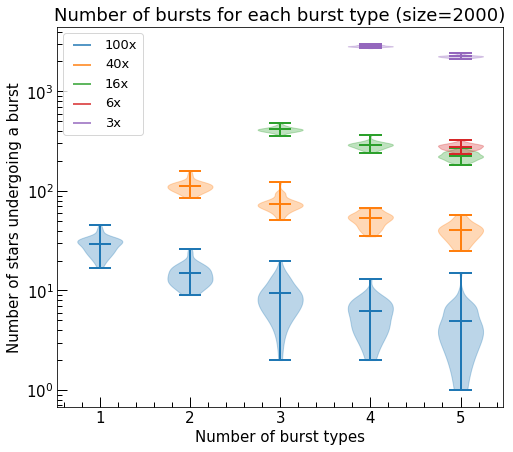

In [44]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data100new,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data40new,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data16new,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data6new,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data3new,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(data100new[0]),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(data40new[0]),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(data16new[0]),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(5,np.mean(data6new[0]),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(4,np.mean(data3new[0]),marker='_',s=300,color='#9467bd',label='3x') 
plt.legend(loc='upper left',fontsize=13)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=18)
plt.yscale('log')

plt.plot()
plt.savefig('/home/lee/research/figs/observational/comp_observational2000_All_log.jpeg',dpi=300,bbox_inches='tight')

In [45]:
data5x_new=[]
for i in range(len(num100_list_5bin)):
    if num100_list_5bin[i]!=0:
        data5x_new.append(num100_list_5bin[i])
        
data4x_new=[]
for i in range(len(num40_list_5bin)):
    if num40_list_5bin[i]!=0:
        data4x_new.append(num40_list_5bin[i])
        
data3x_new=[]
for i in range(len(num16_list_5bin)):
    if num16_list_5bin[i]!=0:
        data3x_new.append(num16_list_5bin[i])
        
data1x_new=[]
for i in range(len(num3_list_5bin)):
    if num3_list_5bin[i]!=0:
        data1x_new.append(num3_list_5bin[i])
        
data2x_new=[]
for i in range(len(num6_list_5bin)):
    if num6_list_5bin[i]!=0:
        data2x_new.append(num6_list_5bin[i])

<ipython-input-46-15ebfa045945>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','0','20','40','60','80','100'])


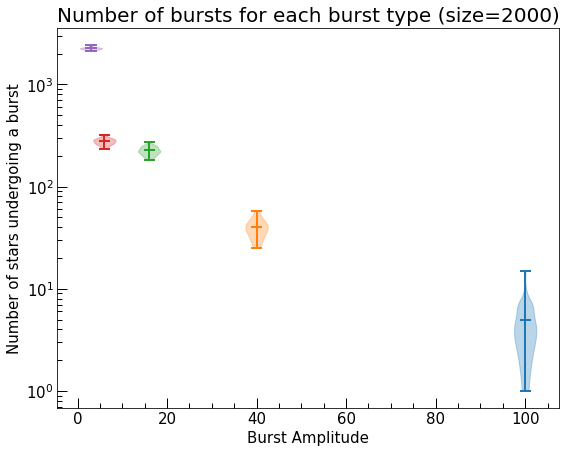

In [46]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data5x_new,positions=[10],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v40=ax1.violinplot(data4x_new,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)
    
v16=ax1.violinplot(data3x_new,positions=[1.6],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v3=ax1.violinplot(data1x_new,positions=[0.3],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)   
    
v6=ax1.violinplot(data2x_new,positions=[0.6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','0','20','40','60','80','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=2000)',fontsize=20)

#ax1.set_xlim(1,200)
plt.yscale('log')
#plt.xscale('log')

plt.plot()
plt.savefig('/home/lee/research/figs/observational/comp_observational2000_5bins_2week_log.jpeg',dpi=300,bbox_inches='tight')

## Just 100x burst

## 50 stars

In [51]:
burst50=np.load('/home/lee/data/cluster_size_change/100x_burst/burst50.npy')
L50=np.load('/home/lee/data/cluster_size_change/100x_burst/L50.npy')
C50=np.load('/home/lee/data/cluster_size_change/100x_burst/C50.npy')

In [52]:
cluster_size50=50
cad_L50=np.zeros((run,cluster_size50,12))
for i in range(run):
    for j in range(cluster_size50):
        for k in range(len(t_list_cadence)):
                cad_L50[i,j,k]=L50[i,j,t_list_cadence[k]]

In [53]:
num50=0
num50_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size50):
            if cad_L50[i,k,j]-cad_L50[i,k,j-1]==5 or cad_L50[i,k,j-1]-cad_L50[i,k,j]==5:
                num50+=1
    num50_list.append(num50)
    num50=0

## 100 stars

In [7]:
burst100=np.load('/home/lee/data/cluster_size_change/burst100.npy')
L100=np.load('/home/lee/data/cluster_size_change/L100.npy')
C100=np.load('/home/lee/data/cluster_size_change/C100.npy')

In [8]:
cluster_size100=100
cad_L100=np.zeros((run,cluster_size100,12))
for i in range(run):
    for j in range(cluster_size100):
        for k in range(len(t_list_cadence)):
                cad_L100[i,j,k]=L100[i,j,t_list_cadence[k]]

In [9]:
num100=0
num100_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size100):
            if cad_L100[i,k,j]-cad_L100[i,k,j-1]==5 or cad_L100[i,k,j-1]-cad_L100[i,k,j]==5:
                num100+=1
    num100_list.append(num100)
    num100=0

## 500 stars

In [10]:
burst500=np.load('/home/lee/data/cluster_size_change/burst500.npy')
L500=np.load('/home/lee/data/cluster_size_change/L500.npy')
C500=np.load('/home/lee/data/cluster_size_change/C500.npy')

In [11]:
cluster_size500=500
cad_L500=np.zeros((run,cluster_size500,12))
for i in range(run):
    for j in range(cluster_size500):
        for k in range(len(t_list_cadence)):
                cad_L500[i,j,k]=L500[i,j,t_list_cadence[k]]

In [12]:
num500=0
num500_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size500):
            if cad_L500[i,k,j]-cad_L500[i,k,j-1]==5 or cad_L500[i,k,j-1]-cad_L500[i,k,j]==5:
                num500+=1
    num500_list.append(num500)
    num500=0

## 1000 stars

In [13]:
burst1000=np.load('/home/lee/data/cluster_size_change/burst1000.npy')
L1000=np.load('/home/lee/data/cluster_size_change/L1000.npy')
C1000=np.load('/home/lee/data/cluster_size_change/C1000.npy')

In [14]:
cluster_size1000=1000
cad_L1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                cad_L1000[i,j,k]=L1000[i,j,t_list_cadence[k]]

In [15]:
num1000=0
num1000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if cad_L1000[i,k,j]-cad_L1000[i,k,j-1]==5 or cad_L1000[i,k,j-1]-cad_L1000[i,k,j]==5:
                num1000+=1
    num1000_list.append(num1000)
    num1000=0

## 2000 stars

In [16]:
burst2000=np.load('/home/lee/data/cluster_size_change/burst2000.npy')
L2000=np.load('/home/lee/data/cluster_size_change/L2000.npy')
C2000=np.load('/home/lee/data/cluster_size_change/C2000.npy')

In [17]:
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
                cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

In [18]:
num2000=0
num2000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size2000):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5 or cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                num2000+=1
    num2000_list.append(num2000)
    num2000=0

## 5000 stars

In [19]:
burst5000=np.load('/home/lee/data/cluster_size_change/burst5000.npy')
L5000=np.load('/home/lee/data/cluster_size_change/L5000.npy')
C5000=np.load('/home/lee/data/cluster_size_change/C5000.npy')

In [20]:
cluster_size5000=5000
cad_L5000=np.zeros((run,cluster_size5000,12))
for i in range(run):
    for j in range(cluster_size5000):
        for k in range(len(t_list_cadence)):
                cad_L5000[i,j,k]=L5000[i,j,t_list_cadence[k]]

In [21]:
num5000=0
num5000_list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size5000):
            if cad_L5000[i,k,j]-cad_L5000[i,k,j-1]==5 or cad_L5000[i,k,j-1]-cad_L5000[i,k,j]==5:
                num5000+=1
    num5000_list.append(num5000)
    num5000=0

In [22]:
num_new50=[]
num_new100=[]
num_new500=[]
num_new1000=[]
num_new2000=[]
num_new5000=[]
for i in range(len(num50_list)):
    if num50_list[i]!=0:
        num_new50.append(num50_list[i])
        
for i in range(len(num100_list)):
    if num100_list[i]!=0:
        num_new100.append(num100_list[i])
        
for i in range(len(num500_list)):
    if num500_list[i]!=0:
        num_new500.append(num500_list[i])
        
for i in range(len(num1000_list)):
    if num1000_list[i]!=0:
        num_new1000.append(num1000_list[i])
        
for i in range(len(num2000_list)):
    if num2000_list[i]!=0:
        num_new2000.append(num2000_list[i])
        
for i in range(len(num5000_list)):
    if num5000_list[i]!=0:
        num_new5000.append(num5000_list[i])

In [23]:
data_num=[num_new50,num_new100,num_new500,num_new1000,num_new2000,num_new5000]

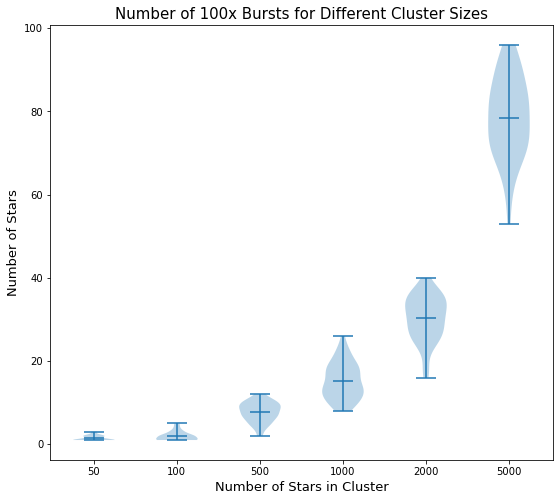

In [29]:
labels=[50,100,500,1000,2000,5000]
fig,ax=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'
ax.violinplot(data_num,vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
plt.xticks([1,2,3,4,5,6,],['50','100','500','1000','2000','5000'])
ax.set_xlabel('Number of Stars in Cluster',fontsize=13)
ax.set_ylabel('Number of Stars',fontsize=13)
ax.set_title('Number of 100x Bursts for Different Cluster Sizes',fontsize=15)
plt.plot()
plt.savefig('/home/lee/research/figs/observational/observationally_bursting_100xonly.jpeg',dpi=300,bbox_inches='tight')

## 1000 stars

## 1 bin

In [2]:
burst1000_1bin=np.load('/home/lee/data/1000stars_only/burst1000_1.npy')
L1000_1bin=np.load('/home/lee/data/1000stars_only/L1000_1.npy')
C1000_1bin=np.load('/home/lee/data/1000stars_only/C1000_1.npy')

In [4]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size1000=1000
steps=7800

In [6]:
L1bin_1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                L1bin_1000[i,j,k]=L1000_1bin[i,j,t_list_cadence[k]]
                
print(np.shape(L1bin_1000))

(50, 1000, 12)


In [7]:
num1_1000=0
num1_1000list=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L1bin_1000[i,k,j]-L1bin_1000[i,k,j-1]==5 or L1bin_1000[i,k,j-1]-L1bin_1000[i,k,j]==5:
                num1_1000+=1
                #print(i,k,j)
                #print(L1bin[i,k,j])
                #print(L1bin[i,k,j-1])
    num1_1000list.append(num1_1000)
    num1_1000=0

## 2 bins

In [11]:
burst1000_2bin=np.load('/home/lee/data/1000stars_only/burst1000_2.npy')
L1000_2bin=np.load('/home/lee/data/1000stars_only/L1000_2.npy')
C1000_2bin=np.load('/home/lee/data/1000stars_only/C1000_2.npy')

In [12]:
L2bin_1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                L2bin_1000[i,j,k]=L1000_2bin[i,j,t_list_cadence[k]]
                
print(np.shape(L2bin_1000))

(50, 1000, 12)


In [13]:
num2_4x1000=0
num2_list4x1000=[]

num2_5x1000=0
num2_list5x1000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L2bin_1000[i,k,j]-L2bin_1000[i,k,j-1]==5 or L2bin_1000[i,k,j-1]-L2bin_1000[i,k,j]==5:
                num2_5x1000+=1
    num2_list5x1000.append(num2_5x1000)
    num2_5x1000=0
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L2bin_1000[i,k,j]-L2bin_1000[i,k,j-1]==4 or L2bin_1000[i,k,j-1]-L2bin_1000[i,k,j]==4:
                num2_4x1000+=1
    num2_list4x1000.append(num2_4x1000)
    num2_4x1000=0

## 3 bins

In [14]:
burst1000_3bin=np.load('/home/lee/data/1000stars_only/burst1000_3.npy')
L1000_3bin=np.load('/home/lee/data/1000stars_only/L1000_3.npy')
C1000_3bin=np.load('/home/lee/data/1000stars_only/C1000_3.npy')

In [15]:
L3bin_1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                L3bin_1000[i,j,k]=L1000_3bin[i,j,t_list_cadence[k]]
                
print(np.shape(L3bin_1000))

(50, 1000, 12)


In [17]:
num3_3x1000=0
num3_list3x1000=[]
num3_4x1000=0
num3_list4x1000=[]
num3_5x1000=0
num3_list5x1000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L3bin_1000[i,k,j]-L3bin_1000[i,k,j-1]==5 or L3bin_1000[i,k,j-1]-L3bin_1000[i,k,j]==5:
                num3_5x1000+=1
    num3_list5x1000.append(num3_5x1000)
    num3_5x1000=0
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L3bin_1000[i,k,j]-L3bin_1000[i,k,j-1]==4 or L3bin_1000[i,k,j-1]-L3bin_1000[i,k,j]==4:
                num3_4x1000+=1
    num3_list4x1000.append(num3_4x1000)
    num3_4x1000=0
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L3bin_1000[i,k,j]-L3bin_1000[i,k,j-1]==3 or L3bin_1000[i,k,j-1]-L3bin_1000[i,k,j]==3:
                num3_3x1000+=1
    num3_list3x1000.append(num3_3x1000)
    num3_3x1000=0

## 4 bins

In [18]:
burst1000_4bin=np.load('/home/lee/data/1000stars_only/burst1000_4.npy')
L1000_4bin=np.load('/home/lee/data/1000stars_only/L1000_4.npy')
C1000_4bin=np.load('/home/lee/data/1000stars_only/C1000_4.npy')

In [19]:
L4bin_1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                L4bin_1000[i,j,k]=L1000_4bin[i,j,t_list_cadence[k]]
                
print(np.shape(L4bin_1000))

(50, 1000, 12)


In [21]:
num4_1x1000=0
num4_list1x1000=[]
num4_3x1000=0
num4_list3x1000=[]
num4_4x1000=0
num4_list4x1000=[]
num4_5x1000=0
num4_list5x1000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L4bin_1000[i,k,j]-L4bin_1000[i,k,j-1]==5 or L4bin_1000[i,k,j-1]-L4bin_1000[i,k,j]==5:
                num4_5x1000+=1
            elif L4bin_1000[i,k,j]-L4bin_1000[i,k,j-1]==4 or L4bin_1000[i,k,j-1]-L4bin_1000[i,k,j]==4:
                num4_4x1000+=1
            elif L4bin_1000[i,k,j]-L4bin_1000[i,k,j-1]==3 or L4bin_1000[i,k,j-1]-L4bin_1000[i,k,j]==3:
                num4_3x1000+=1
            elif L4bin_1000[i,k,j]-L4bin_1000[i,k,j-1]==1.25 or L4bin_1000[i,k,j-1]-L4bin_1000[i,k,j]==1.25:
                num4_1x1000+=1
    num4_list1x1000.append(num4_1x1000)
    num4_1x1000=0
    num4_list3x1000.append(num4_3x1000)
    num4_3x1000=0
    num4_list4x1000.append(num4_4x1000)
    num4_4x1000=0
    num4_list5x1000.append(num4_5x1000)
    num4_5x1000=0

## 5 bins

In [22]:
burst1000_5bin=np.load('/home/lee/data/1000stars_only/burst1000_5.npy')
L1000_5bin=np.load('/home/lee/data/1000stars_only/L1000_5.npy')
C1000_5bin=np.load('/home/lee/data/1000stars_only/C1000_5.npy')

In [23]:
L5bin_1000=np.zeros((run,cluster_size1000,12))
for i in range(run):
    for j in range(cluster_size1000):
        for k in range(len(t_list_cadence)):
                L5bin_1000[i,j,k]=L1000_5bin[i,j,t_list_cadence[k]]
                
print(np.shape(L5bin_1000))

(50, 1000, 12)


In [24]:
num5_2x1000=0
num5_list2x1000=[]
num5_1x1000=0
num5_list1x1000=[]
num5_3x1000=0
num5_list3x1000=[]
num5_4x1000=0
num5_list4x1000=[]
num5_5x1000=0
num5_list5x1000=[]
for i in range(run):
    for j in range(1,12):
        for k in range(cluster_size1000):
            if L5bin_1000[i,k,j]-L5bin_1000[i,k,j-1]==5 or L5bin_1000[i,k,j-1]-L5bin_1000[i,k,j]==5:
                num5_5x1000+=1
            elif L5bin_1000[i,k,j]-L5bin_1000[i,k,j-1]==4 or L5bin_1000[i,k,j-1]-L5bin_1000[i,k,j]==4:
                num5_4x1000+=1
            elif L5bin_1000[i,k,j]-L5bin_1000[i,k,j-1]==3 or L5bin_1000[i,k,j-1]-L5bin_1000[i,k,j]==3:
                num5_3x1000+=1
            elif L5bin_1000[i,k,j]-L5bin_1000[i,k,j-1]==1.25 or L5bin_1000[i,k,j-1]-L5bin_1000[i,k,j]==1.25:
                num5_1x1000+=1
            elif L5bin_1000[i,k,j]-L5bin_1000[i,k,j-1]==2 or L5bin_1000[i,k,j-1]-L5bin_1000[i,k,j]==2:
                num5_2x1000+=1
    num5_list2x1000.append(num5_2x1000)
    num5_2x1000=0
    num5_list1x1000.append(num5_1x1000)
    num5_1x1000=0
    num5_list3x1000.append(num5_3x1000)
    num5_3x1000=0
    num5_list4x1000.append(num5_4x1000)
    num5_4x1000=0
    num5_list5x1000.append(num5_5x1000)
    num5_5x1000=0

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f9e40376610>],
 'cmeans': <matplotlib.collections.LineCollection at 0x7f9e40376460>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f9e40376a90>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f9e40376d90>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f9e403830d0>}

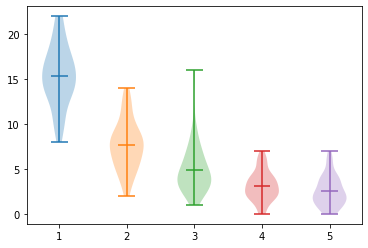

In [27]:
plt.violinplot(num1_1000list,vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num2_list5x1000,positions=[2],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num3_list5x1000,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num4_list5x1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
plt.violinplot(num5_list5x1000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)

In [28]:
data100_1000=[num1_1000list,num2_list5x1000,num3_list5x1000,num4_list5x1000,num5_list5x1000]
data40_1000=[num2_list4x1000,num3_list4x1000,num4_list4x1000,num5_list4x1000]
data16_1000=[num3_list3x1000,num4_list3x1000,num5_list3x1000]
data3_1000=[num4_list1x1000,num5_list1x1000]
data6_1000=[num5_list2x1000]

In [29]:
#make it log scale?
data100new_1000=[]
list100_1000=[]
for i in range(5):
    for j in range(50):
        if data100_1000[i][j]!=0:
            list100_1000.append(data100_1000[i][j])
    data100new_1000.append(list100_1000)
    list100_1000=[]
    
data40new_1000=[]
list40_1000=[]
for i in range(4):
    for j in range(50):
        if data40_1000[i][j]!=0:
            list40_1000.append(data40_1000[i][j])
    data40new_1000.append(list40_1000)
    list40_1000=[]
    
data16new_1000=[]
list16_1000=[]
for i in range(3):
    for j in range(50):
        if data16_1000[i][j]!=0:
            list16_1000.append(data16_1000[i][j])
    data16new_1000.append(list16_1000)
    list16_1000=[]
    
data6new_1000=[]
list6_1000=[]
for i in range(1):
    for j in range(50):
        if data6_1000[i][j]!=0:
            list6_1000.append(data6_1000[i][j])
    data6new_1000.append(list6_1000)
    list6_1000=[]
    
data3new_1000=[]
list3_1000=[]
for i in range(2):
    for j in range(50):
        if data3_1000[i][j]!=0:
            list3_1000.append(data3_1000[i][j])
    data3new_1000.append(list3_1000)
    list3_1000=[]

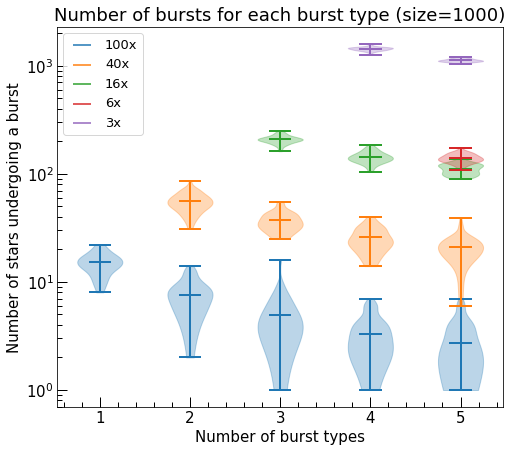

In [30]:
fig,ax1=plt.subplots()
fig.set_size_inches(8,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data100new_1000,vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)

v40=ax1.violinplot(data40new_1000,positions=[2,3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)

v16=ax1.violinplot(data16new_1000,positions=[3,4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v6=ax1.violinplot(data6new_1000,positions=[5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

v3=ax1.violinplot(data3new_1000,positions=[4,5],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)
    
ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)
    
ax1.scatter(1,np.mean(data100new_1000[0]),marker='_',s=300,color='#1f77b4',label='100x')
ax1.scatter(2,np.mean(data40new_1000[0]),marker='_',s=300,color='#ff7f0e',label='40x')
ax1.scatter(3,np.mean(data16new_1000[0]),marker='_',s=300,color='#2ca02c',label='16x')
ax1.scatter(5,np.mean(data6new_1000[0]),marker='_',s=300,color='#d62728',label='6x')
ax1.scatter(4,np.mean(data3new_1000[0]),marker='_',s=300,color='#9467bd',label='3x') 
plt.legend(loc='upper left',fontsize=13)

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Number of burst types',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=1000)',fontsize=18)
plt.yscale('log')

plt.plot()
plt.savefig('/home/lee/research/figs/observational/comp_observational1000_All_log.jpeg',dpi=300,bbox_inches='tight')

In [32]:
data5x_new1000=[]
for i in range(len(num5_list5x1000)):
    if num5_list5x1000[i]!=0:
        data5x_new1000.append(num5_list5x1000[i])
        
data4x_new1000=[]
for i in range(len(num5_list4x1000)):
    if num5_list4x1000[i]!=0:
        data4x_new1000.append(num5_list4x1000[i])
        
data3x_new1000=[]
for i in range(len(num5_list3x1000)):
    if num5_list3x1000[i]!=0:
        data3x_new1000.append(num5_list3x1000[i])
        
data1x_new1000=[]
for i in range(len(num5_list1x1000)):
    if num5_list1x1000[i]!=0:
        data1x_new1000.append(num5_list1x1000[i])
        
data2x_new1000=[]
for i in range(len(num5_list2x1000)):
    if num5_list2x1000[i]!=0:
        data2x_new1000.append(num5_list2x1000[i])

<ipython-input-33-0e6df9595474>:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','0','20','40','60','80','100'])


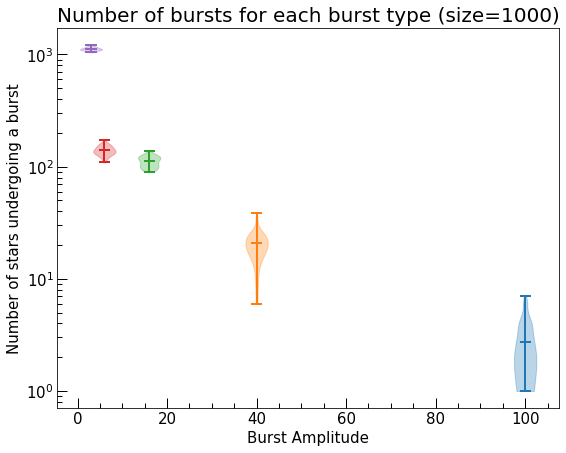

In [33]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,7)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='sans serif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

#ax1
v100=ax1.violinplot(data5x_new1000,positions=[10],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v100['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v100[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2)
    
v40=ax1.violinplot(data4x_new1000,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v40['bodies']:
    pc.set_facecolor('#ff7f0e')
    pc.set_edgecolor('#ff7f0e')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v40[partname]
    vp.set_edgecolor('#ff7f0e')
    vp.set_linewidth(2)
    
v16=ax1.violinplot(data3x_new1000,positions=[1.6],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v16['bodies']:
    pc.set_facecolor('#2ca02c')
    pc.set_edgecolor('#2ca02c')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v16[partname]
    vp.set_edgecolor('#2ca02c')
    vp.set_linewidth(2)
    
v3=ax1.violinplot(data1x_new1000,positions=[0.3],vert=True, widths=0.5, showmeans=True, showextrema=True, showmedians=False)
for pc in v3['bodies']:
    pc.set_facecolor('#9467bd')
    pc.set_edgecolor('#9467bd')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v3[partname]
    vp.set_edgecolor('#9467bd')
    vp.set_linewidth(2)   
    
v6=ax1.violinplot(data2x_new1000,positions=[0.6],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v6['bodies']:
    pc.set_facecolor('#d62728')
    pc.set_edgecolor('#d62728')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v6[partname]
    vp.set_edgecolor('#d62728')
    vp.set_linewidth(2)

ax1.minorticks_on()
ax1.locator_params(axis='y',nbins=6)
#ax1.yaxis.set_ticks_position('both')
#ax1.tick_params(axis='both',right=True,top=True,which='both')
ax1.tick_params(axis='both',which='major', length=10, width=1, direction='in',labelsize=15)
ax1.tick_params(axis='both',which='minor', length=5, width=1, direction='in',labelsize=15)

ax1.set_xticklabels(['0','0','20','40','60','80','100'])

ax1.set_ylabel(r'Number of stars undergoing a burst',fontsize=15)
ax1.set_xlabel('Burst Amplitude',fontsize=15)
ax1.set_title('Number of bursts for each burst type (size=1000)',fontsize=20)

#ax1.set_xlim(1,200)
plt.yscale('log')
#plt.xscale('log')

plt.plot()
plt.savefig('/home/lee/research/figs/observational/comp_observational1000_5bins_2week_log.jpeg',dpi=300,bbox_inches='tight')

In [1]:
print('max=',np.max(num100_total_2000))
print('min=',np.min(num100_total_2000))
print('mean=',np.mean(num100_total_2000))
error2000up=(np.max(num100_total_2000)-np.mean(num100_total_2000))/((np.max(num100_total_2000)+np.mean(num100_total_2000))/2)
error2000down=(np.mean(num100_total_2000)-np.min(num100_total_2000))/((np.min(num100_total_2000)+np.mean(num100_total_2000))/2)
print(error2000up)
print(error2000down)
avg2000=(error2000up+error2000down)/2
print(avg2000*100)

NameError: name 'np' is not defined

In [14]:
print('max=',np.max(num100_total_1000))
print('min=',np.min(num100_total_1000))
print('mean=',np.mean(num100_total_1000))
print(np.max(num100_total_1000)/np.mean(num100_total_1000))
error1000up=(np.max(num100_total_1000)-np.mean(num100_total_1000))/((np.max(num100_total_1000)+np.mean(num100_total_1000))/2)
print(error1000up)
error1000down=(np.mean(num100_total_1000)-np.min(num100_total_1000))/((np.min(num100_total_1000)+np.mean(num100_total_1000))/2)
print(error1000down)
avg1000=(error1000up+error1000down)/2
print(avg1000*100)

max= 19.154265507588036
min= 6.784260515603799
mean= 12.039894292817234
1.590899807070158
0.4561348188437743
0.55839253668508
50.726367776442714
